Cначала я юзал только xgb, довел до хорошего результата на паблике 0.7724

Под конец соревнования узнал о lightgbm, и просто сблендил lightgbm и xgb

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [6]:
train = pd.read_pickle('data/train_prep.pkl')
test = pd.read_pickle('data/test_prep.pkl')

In [7]:
outcome = pd.read_csv('data/credit_train.csv',sep = ';')
y = outcome['open_account_flg']

In [8]:
del train['client_id']
del test['client_id']

In [9]:
import xgboost as xgb

In [10]:
dtrain = xgb.DMatrix( train.values, label=y)

In [11]:
dtest = xgb.DMatrix(test.values)

In [12]:
param = {'max_depth':8, 'eta':0.0005, 'silent':0, 'objective':'binary:logistic','subsample':0.5,'seed':202}
param['eval_metric'] = 'auc'
trees = 30000

In [13]:
#надо было больше cv сделать
%%time
cv = xgb.cv(param, dtrain, metrics=('auc'), show_stdv=True, num_boost_round=trees,nfold=2)

Wall time: 5h 27min 11s


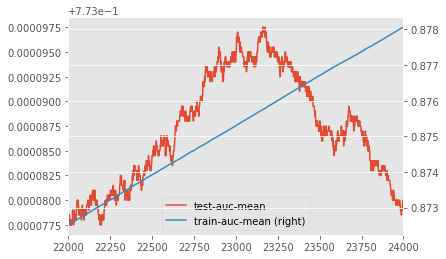

In [14]:
cv[22000:24000].plot(y=['test-auc-mean', 'train-auc-mean'], secondary_y='train-auc-mean')

In [15]:
cv.loc[cv['test-auc-mean'].argmax()]

test-auc-mean     0.773097
test-auc-std      0.001205
train-auc-mean    0.875749
train-auc-std     0.000777
Name: 23161, dtype: float64

In [37]:
param = {'max_depth':8, 'eta':0.0005, 'silent':0, 'objective':'binary:logistic','subsample':0.5,'seed':203}
param['eval_metric'] = 'auc'
trees = 23161

In [38]:
%%time
bst = xgb.train(param,dtrain,trees)

Wall time: 3h 54min 58s


In [39]:
bst.save_model('best_xgb')

In [41]:
%%time
ypred = bst.predict(dtest)

Wall time: 1min 43s


In [44]:
ans = pd.DataFrame()
temp = pd.read_csv('data/credit_test.csv',sep = ';')
ans['id'] = temp['client_id']
ans['p'] = ypred
ans.to_csv('xgb_best.csv',index=False, sep = ',')